In [4]:
import pandas as pd
df=pd.read_csv("jpm_weekly_return_volatility.csv")
df["+/-"]=df["Label"].apply(lambda x: "+" if x == "green" else "-")
df_tr=df[(df["Year"]==2019)|(df["Year"]==2020)|(df["Year"]==2021)]
df_t=df[(df["Year"]==2022)|(df["Year"]==2023)]
df.head(6)

,Year,Week_Number,mean_return,volatility,Label,+/-
0,2019,0,0.755333,2.636439,green,+
1,2019,1,-0.155400,0.210286,red,-
2,2019,2,0.920600,0.451274,green,+
3,2019,3,-0.285000,0.936882,red,-
4,2019,4,0.095600,0.548815,green,+
5,2019,5,-0.488000,0.678885,red,-


In [5]:
df_red=len(df_tr[df_tr["+/-"]=="-"])/len(df_tr)
df_green=len(df_tr[df_tr["+/-"]=="+"])/len(df_tr)

In [6]:
df_red

0.46835443037974683

In [7]:
df_green

0.5316455696202531

In [8]:
a=((df_tr["+/-"].shift(-1) == '+') & (df_tr["+/-"] == '-')).sum()
b=len(df_tr["+/-"]=="-")
print(a/b)

0.22151898734177214


In [9]:
a=((df_tr["+/-"].shift(-1) == '-') & (df_tr["+/-"] == '+')).sum()
b=len(df_tr["+/-"]=="+")
print(a/b) 

0.22151898734177214


In [10]:
a=((df_tr["+/-"].shift(-2) == '+') & (df_tr["+/-"].shift(-1) == '-') & (df_tr["+/-"] == '-')).sum()
b=((df_tr["+/-"].shift(-1) == '-') & (df_tr["+/-"]== '-')).sum()
print(a/b)

0.46153846153846156


In [11]:
a=((df_tr["+/-"].shift(-2) == '-') & (df_tr["+/-"].shift(-1) == '+') & (df_tr["+/-"] == '+')).sum()
b=((df_tr["+/-"].shift(-1) == '+') & (df_tr["+/-"] == '+')).sum()
print(a/b)

0.4166666666666667


In [12]:
a=((df_tr["+/-"].shift(-3) == '+') & (df_tr["+/-"].shift(-2) == '-') & (df_tr["+/-"].shift(-1) == '-') & (df_tr["+/-"] == '-')).sum()
b=((df_tr["+/-"].shift(-2) == '-') & (df_tr["+/-"].shift(-1) == '-') & (df_tr["+/-"] == '-')).sum()
print(a/b)

0.47619047619047616


In [13]:
a=((df_tr["+/-"].shift(-3) == '-') & (df_tr["+/-"].shift(-2) == '+') & (df_tr["+/-"].shift(-1) == '+') & (df_tr["+/-"] == '+')).sum()
b=((df_tr["+/-"].shift(-2) == '+') & (df_tr["+/-"].shift(-1) == '+') & (df_tr["+/-"] == '+')).sum()
print(a/b)

0.48148148148148145


In [14]:
import pandas as pd
import pandas as pd
df_t.reset_index(drop=True, inplace=True)
print(len(df_t))
df_t["Predicted_2"]=None
df_t["Predicted_2"][0]="+"
df_t["Predicted_2"][1]="-"
for i in range(2, len(df_t)):

    x=df_t['Predicted_2'].iloc[i-2]
    y=df_t['Predicted_2'].iloc[i-1]
    a=((df_tr["+/-"] == x) & (df_tr["+/-"].shift(-1) == y) & (df_tr["+/-"].shift(-2) == '+')).sum()
    b=((df_tr["+/-"] == x) & (df_tr["+/-"].shift(-1) == y) & (df_tr["+/-"].shift(-2) == '-')).sum()
    if a > b:
        pred = '+'
    else:
        pred = '-'

    df_t.at[i,'Predicted_2'] = pred

print(df_t.head(5))

104


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_13484\2075645103.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_t["Predicted_2"]=None
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_13484\2075645103.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_t["Predicted_2"][0]="+"
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_13484\2075645103.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-

   Year  Week_Number  mean_return  volatility  Label +/- Predicted_2
0  2022            1       1.2264    2.048192  green   +           +
1  2022            2      -1.1012    2.831380    red   -           -
2  2022            3      -2.0850    1.456614    red   -           -
3  2022            4       0.2160    1.201691  green   +           -
4  2022            5       0.8084    1.547716  green   +           -


In [15]:
import pandas as pd
import pandas as pd
df_t.reset_index(drop=True, inplace=True)
print(len(df_t))
df_t["Predicted_3"]=None
df_t["Predicted_3"][0]="+"
df_t["Predicted_3"][1]="-"
df_t["Predicted_3"][2]="+"
for i in range(3, len(df_t)):

    x=df_t['Predicted_3'].iloc[i-3]
    y=df_t['Predicted_3'].iloc[i-2]
    z=df_t['Predicted_3'].iloc[i-1]
    a=((df_tr["+/-"] == x) & (df_tr["+/-"].shift(-1) == y) & (df_tr["+/-"].shift(-2) == z) & (df_tr["+/-"].shift(-3)  == "+")).sum()
    b=((df_tr["+/-"] == x) & (df_tr["+/-"].shift(-1) == y) & (df_tr["+/-"].shift(-2) == z) & (df_tr["+/-"].shift(-3)  == "-")).sum()
    if a > b:
        pred = '+'
    else:
        pred = '-'

    df_t.at[i,'Predicted_3'] = pred

print(df_t.head(5))

104


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_13484\1901966978.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_t["Predicted_3"]=None
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_13484\1901966978.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_t["Predicted_3"][0]="+"
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_13484\1901966978.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-

   Year  Week_Number  mean_return  volatility  Label +/- Predicted_2  \
0  2022            1       1.2264    2.048192  green   +           +   
1  2022            2      -1.1012    2.831380    red   -           -   
2  2022            3      -2.0850    1.456614    red   -           -   
3  2022            4       0.2160    1.201691  green   +           -   
4  2022            5       0.8084    1.547716  green   +           -   

  Predicted_3  
0           +  
1           -  
2           +  
3           -  
4           -  


In [16]:
import pandas as pd
import pandas as pd
df_t.reset_index(drop=True, inplace=True)
print(len(df_t))
df_t["Predicted_4"]=None
df_t["Predicted_4"][0]="+"
df_t["Predicted_4"][1]="-"
df_t["Predicted_4"][2]="+"
df_t["Predicted_4"][3]="-"
for i in range(3, len(df_t)):

    x=df_t['Predicted_4'].iloc[i-4]
    y=df_t['Predicted_4'].iloc[i-3]
    z=df_t['Predicted_4'].iloc[i-2]
    e=df_t['Predicted_4'].iloc[i-1]
    a=((df_tr["+/-"] == x) & (df_tr["+/-"].shift(-1) == y) & (df_tr["+/-"].shift(-2) == z) & (df_tr["+/-"].shift(-3) == e) & (df_tr["+/-"].shift(-4) == "+")).sum()
    b=((df_tr["+/-"] == x) & (df_tr["+/-"].shift(-1) == y) & (df_tr["+/-"].shift(-2) == z) & (df_tr["+/-"].shift(-3) == e) & (df_tr["+/-"].shift(-4) == "+")).sum()
    if a > b:
        pred = '+'
    else:
        pred = '-'

    df_t.at[i,'Predicted_4'] = pred

print(df_t.head(5))

104


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_13484\2037469819.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_t["Predicted_4"]=None
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_13484\2037469819.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_t["Predicted_4"][0]="+"
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_13484\2037469819.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-

   Year  Week_Number  mean_return  volatility  Label +/- Predicted_2  \
0  2022            1       1.2264    2.048192  green   +           +   
1  2022            2      -1.1012    2.831380    red   -           -   
2  2022            3      -2.0850    1.456614    red   -           -   
3  2022            4       0.2160    1.201691  green   +           -   
4  2022            5       0.8084    1.547716  green   +           -   

  Predicted_3 Predicted_4  
0           +           +  
1           -           -  
2           +           +  
3           -           -  
4           -           -  


In [17]:
df_t['ensemble'] = df_t[["Predicted_2","Predicted_3","Predicted_4"]].mode(axis=1).iloc[:, 0]
df_t.head(5)

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_13484\3749456701.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_t['ensemble'] = df_t[["Predicted_2","Predicted_3","Predicted_4"]].mode(axis=1).iloc[:, 0]


,Year,Week_Number,mean_return,volatility,Label,+/-,Predicted_2,Predicted_3,Predicted_4,ensemble
0,2022,1,1.2264,2.048192,green,+,+,+,+,+
1,2022,2,-1.1012,2.831380,red,-,-,-,-,-
2,2022,3,-2.0850,1.456614,red,-,-,+,+,+
3,2022,4,0.2160,1.201691,green,+,-,-,-,-
4,2022,5,0.8084,1.547716,green,+,-,-,-,-


In [18]:
a2=(df_t["Predicted_2"]==df_t["+/-"]).sum()/len(df_t)*100
a3=(df_t["Predicted_3"]==df_t["+/-"]).sum()/len(df_t)*100
a4=(df_t["Predicted_4"]==df_t["+/-"]).sum()/len(df_t)*100
print(a2,a3,a4)

50.0 49.03846153846153 49.03846153846153


In [19]:
aensemble=(df_t["ensemble"]==df_t["+/-"]).sum()/len(df_t)*100
print(aensemble)

49.03846153846153


In [20]:
minus_2 = ((df_t['Predicted_2'] == '-') & (df_t['+/-'] == '-')).sum()/len(df_t)*100
plus_2 = ((df_t['Predicted_2'] == '+') & (df_t['+/-'] == '+')).sum()/len(df_t)*100
minus_3 = ((df_t['Predicted_3'] == '-') & (df_t['+/-'] == '-')).sum()/len(df_t)*100
plus_3 = ((df_t['Predicted_3'] == '+') & (df_t['+/-'] == '+')).sum()/len(df_t)*100
minus_4 = ((df_t['Predicted_4'] == '-') & (df_t['+/-'] == '-')).sum()/len(df_t)*100
plus_4 = ((df_t['Predicted_4'] == '+') & (df_t['+/-'] == '+')).sum()/len(df_t)*100
minus_ensemble = ((df_t['ensemble'] == '-') & (df_t['+/-'] == '-')).sum()/len(df_t)*100
plus_ensemble = (((df_t['ensemble'] == '+') & (df_t['+/-'] == '+')).sum()/len(df_t))*100
print(minus_2,"\n",minus_3,"\n",minus_4,"\n",minus_ensemble,"\n",plus_2,"\n",plus_3,"\n",plus_4,"\n",plus_ensemble)

49.03846153846153 
 48.07692307692308 
 48.07692307692308 
 48.07692307692308 
 0.9615384615384616 
 0.9615384615384616 
 0.9615384615384616 
 0.9615384615384616


In [21]:
TP2=((df_t['Predicted_2'] == '+') & (df_t['+/-'] == '+')).sum()
FP2=((df_t['Predicted_2'] == '+') & (df_t['+/-'] == '-')).sum()
TN2=((df_t['Predicted_2'] == '-') & (df_t['+/-'] == '-')).sum()
FN2=((df_t['Predicted_2'] == '-') & (df_t['+/-'] == '+')).sum()
TPR2=TP2/(TP2+FN2)
TNR2=TN2/(TN2+FP2)
print(TP2,FP2,TN2,FN2,TPR2,TNR2)

1 0 51 52 0.018867924528301886 1.0


In [22]:
TP3=((df_t['Predicted_3'] == '+') & (df_t['+/-'] == '+')).sum()
FP3=((df_t['Predicted_3'] == '+') & (df_t['+/-'] == '-')).sum()
TN3=((df_t['Predicted_3'] == '-') & (df_t['+/-'] == '-')).sum()
FN3=((df_t['Predicted_3'] == '-') & (df_t['+/-'] == '+')).sum()
TPR3=TP3/(TP3+FN3)
TNR3=TN3/(TN3+FP3)
print(TP3,FP3,TN3,FN3,TPR3,TNR3)

1 1 50 52 0.018867924528301886 0.9803921568627451


In [23]:
TP4=((df_t['Predicted_4'] == '+') & (df_t['+/-'] == '+')).sum()
FP4=((df_t['Predicted_4'] == '+') & (df_t['+/-'] == '-')).sum()
TN4=((df_t['Predicted_4'] == '-') & (df_t['+/-'] == '-')).sum()
FN4=((df_t['Predicted_4'] == '-') & (df_t['+/-'] == '+')).sum()
TPR4=TP4/(TP4+FN4)
TNR4=TN4/(TN4+FP4)
print(TP4,FP4,TN4,FN4,TPR4,TNR4)

1 1 50 52 0.018867924528301886 0.9803921568627451


In [24]:
TPe=((df_t['ensemble'] == '+') & (df_t['+/-'] == '+')).sum()
FPe=((df_t['ensemble'] == '+') & (df_t['+/-'] == '-')).sum()
TNe=((df_t['ensemble'] == '-') & (df_t['+/-'] == '-')).sum()
FNe=((df_t['ensemble'] == '-') & (df_t['+/-'] == '+')).sum()
TPRe=TPe/(TPe+FNe)
TNRe=TNe/(TNe+FPe)
print(TPe,FPe,TNe,FNe,TPRe,TNRe)

1 1 50 52 0.018867924528301886 0.9803921568627451


In [25]:
df_t["I1"]=None
df_t["I1"]= df_tr["+/-"].shift(+1)
df_t["I1"][0]="+"
df_t.head(5)

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_13484\659725704.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_t["I1"]=None
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_13484\659725704.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_t["I1"]= df_tr["+/-"].shift(+1)
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_13484\659725704.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/sta

,Year,Week_Number,mean_return,volatility,Label,+/-,Predicted_2,Predicted_3,Predicted_4,ensemble,I1
0,2022,1,1.2264,2.048192,green,+,+,+,+,+,+
1,2022,2,-1.1012,2.831380,red,-,-,-,-,-,+
2,2022,3,-2.0850,1.456614,red,-,-,+,+,+,-
3,2022,4,0.2160,1.201691,green,+,-,-,-,-,+
4,2022,5,0.8084,1.547716,green,+,-,-,-,-,-


In [26]:
df_t["I3"]=None
df_t["I3"][0:3]="+"
for i in range(3, len(df_t)):
    df_t["I3"][i]= df_tr["+/-"][0:i].mode()[0]
df_t.head(5)

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_13484\1773446410.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_t["I3"]=None
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_13484\1773446410.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_t["I3"][0:3]="+"
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_13484\1773446410.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_t["I

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_13484\1773446410.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_t["I3"][i]= df_tr["+/-"][0:i].mode()[0]
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_13484\1773446410.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_t["I3"][i]= df_tr["+/-"][0:i].mode()[0]
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_13484\1773446410.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_t["I3"][i]=

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_13484\1773446410.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_t["I3"][i]= df_tr["+/-"][0:i].mode()[0]
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_13484\1773446410.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_t["I3"][i]= df_tr["+/-"][0:i].mode()[0]
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_13484\1773446410.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_t["I3"][i]=

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_13484\1773446410.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_t["I3"][i]= df_tr["+/-"][0:i].mode()[0]
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_13484\1773446410.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_t["I3"][i]= df_tr["+/-"][0:i].mode()[0]
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_13484\1773446410.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_t["I3"][i]=

,Year,Week_Number,mean_return,volatility,Label,+/-,Predicted_2,Predicted_3,Predicted_4,ensemble,I1,I3
0,2022,1,1.2264,2.048192,green,+,+,+,+,+,+,+
1,2022,2,-1.1012,2.831380,red,-,-,-,-,-,+,+
2,2022,3,-2.0850,1.456614,red,-,-,+,+,+,-,+
3,2022,4,0.2160,1.201691,green,+,-,-,-,-,+,+
4,2022,5,0.8084,1.547716,green,+,-,-,-,-,-,+


In [27]:
df_t["I5"]=None
df_t["I5"][0:5]="+"
for i in range(5, len(df_t)):
    df_t["I5"][i]= df_tr["+/-"][0:i].mode()[0]
df_t.head(5)

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_13484\201508744.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_t["I5"]=None
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_13484\201508744.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_t["I5"][0:5]="+"
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_13484\201508744.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_t["I5"]

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_13484\201508744.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_t["I5"][i]= df_tr["+/-"][0:i].mode()[0]
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_13484\201508744.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_t["I5"][i]= df_tr["+/-"][0:i].mode()[0]
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_13484\201508744.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_t["I5"][i]= df

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_13484\201508744.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_t["I5"][i]= df_tr["+/-"][0:i].mode()[0]
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_13484\201508744.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_t["I5"][i]= df_tr["+/-"][0:i].mode()[0]
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_13484\201508744.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_t["I5"][i]= df

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_13484\201508744.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_t["I5"][i]= df_tr["+/-"][0:i].mode()[0]
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_13484\201508744.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_t["I5"][i]= df_tr["+/-"][0:i].mode()[0]
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_13484\201508744.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_t["I5"][i]= df

,Year,Week_Number,mean_return,volatility,Label,+/-,Predicted_2,Predicted_3,Predicted_4,ensemble,I1,I3,I5
0,2022,1,1.2264,2.048192,green,+,+,+,+,+,+,+,+
1,2022,2,-1.1012,2.831380,red,-,-,-,-,-,+,+,+
2,2022,3,-2.0850,1.456614,red,-,-,+,+,+,-,+,+
3,2022,4,0.2160,1.201691,green,+,-,-,-,-,+,+,+
4,2022,5,0.8084,1.547716,green,+,-,-,-,-,-,+,+


In [28]:
df_t.to_csv("megafile.csv")

In [29]:
import pandas as pd

df = pd.read_csv('jpm_assignment_4.csv')
x = []
for i in range(2022, 2024): 
    df_52_week = df[(df['Year'] == i) & (df['Week_Number'] == 52)]
    a = df_52_week.iloc[-1]['Adj Close']
    x.append(a - 100)
    print("profit for the year", i, "is:",a-100)

print(x)

profit for the year 2022 is: 29.42036440000001
profit for the year 2023 is: 69.05754089999999
[29.42036440000001, 69.05754089999999]


In [30]:
import pandas as pd

def calculate_cash_for_year(df_year):
    cash = 100  #given amount in the problem
    first_green_week = None 

    # Find the first green week in the given year
    for i in range(1, 53):
        if ((df_year["Week_Number"] == i) & (df_year["Predicted_2"] == "green")).any():
            first_green_week = i
            cash = 100 - df_year.loc[(df_year["Week_Number"] == i) & (df_year["Predicted_2"] == "green"), "Open"].iloc[0]
            break

    # starting from first_green_year
    if first_green_week is not None:
        for i in range(first_green_week, 53): 
            if ((df_year["Week_Number"] == i) & (df_year["Predicted_2"] == "green")).any():
                if ((df_year["Week_Number"] == i+1) & (df_year["Predicted_2"] == "red")).any():
                    cash += df_year.loc[df_year["Week_Number"] == first_green_week, "Adj Close"].iloc[-1]
                else:
                    continue  
            else:
                if ((df_year["Week_Number"] == i) & (df_year["Label"] == "red")).any():
                    if ((df_year["Week_Number"] == i+1) & (df_year["Label"] == "green")).any():
                        cash -= df_year.loc[df_year["Week_Number"] == i, "Open"].iloc[0]
                    else:
                        continue

    return cash

df = pd.read_csv('jpm_assignment_4.csv')
years = range(2022, 2024)
y = []

for year in years:
    df_year = df[df["Year"] == year]
    s = calculate_cash_for_year(df_year)
    print("cash at the end of",year,"is:", s)
    y.append(s)

print(y)

cash at the end of 2022 is: -1403.3220902
cash at the end of 2023 is: 100
[-1403.3220902, 100]


In [31]:
import pandas as pd

def calculate_cash_for_year(df_year):
    cash = 100  #given amount in the problem
    first_green_week = None 

    # Find the first green week in the given year
    for i in range(1, 53):
        if ((df_year["Week_Number"] == i) & (df_year["ensemble"] == "green")).any():
            first_green_week = i
            cash = 100 - df_year.loc[(df_year["Week_Number"] == i) & (df_year["ensemble"] == "green"), "Open"].iloc[0]
            break

    # starting from first_green_year
    if first_green_week is not None:
        for i in range(first_green_week, 53): 
            if ((df_year["Week_Number"] == i) & (df_year["ensemble"] == "green")).any():
                if ((df_year["Week_Number"] == i+1) & (df_year["ensemble"] == "red")).any():
                    cash += df_year.loc[df_year["Week_Number"] == first_green_week, "Adj Close"].iloc[-1]
                else:
                    continue  
            else:
                if ((df_year["Week_Number"] == i) & (df_year["Label"] == "red")).any():
                    if ((df_year["Week_Number"] == i+1) & (df_year["Label"] == "green")).any():
                        cash -= df_year.loc[df_year["Week_Number"] == i, "Open"].iloc[0]
                    else:
                        continue

    return cash

df = pd.read_csv('jpm_assignment_4.csv')
years = range(2022, 2024)
y = []

for year in years:
    df_year = df[df["Year"] == year]
    s = calculate_cash_for_year(df_year)
    print("cash at the end of",year,"is:", s)
    y.append(s)

print(y)

cash at the end of 2022 is: -1090.21418
cash at the end of 2023 is: 100
[-1090.21418, 100]


In [32]:
import pandas as pd

def calculate_cash_for_year(df_year):
    cash = 100  #given amount in the problem
    first_green_week = None 

    # Find the first green week in the given year
    for i in range(1, 53):
        if ((df_year["Week_Number"] == i) & (df_year["I1"] == "green")).any():
            first_green_week = i
            cash = 100 - df_year.loc[(df_year["Week_Number"] == i) & (df_year["I1"] == "green"), "Open"].iloc[0]
            break

    # starting from first_green_year
    if first_green_week is not None:
        for i in range(first_green_week, 53): 
            if ((df_year["Week_Number"] == i) & (df_year["I1"] == "green")).any():
                if ((df_year["Week_Number"] == i+1) & (df_year["I1"] == "red")).any():
                    cash += df_year.loc[df_year["Week_Number"] == first_green_week, "Adj Close"].iloc[-1]
                else:
                    continue  
            else:
                if ((df_year["Week_Number"] == i) & (df_year["Label"] == "red")).any():
                    if ((df_year["Week_Number"] == i+1) & (df_year["Label"] == "green")).any():
                        cash -= df_year.loc[df_year["Week_Number"] == i, "Open"].iloc[0]
                    else:
                        continue

    return cash

df = pd.read_csv('jpm_assignment_4.csv')
years = range(2022, 2024)
y = []

for year in years:
    df_year = df[df["Year"] == year]
    s = calculate_cash_for_year(df_year)
    print("cash at the end of",year,"is:", s)
    y.append(s)

print(y)

cash at the end of 2022 is: 1083.904938
cash at the end of 2023 is: 50.36708829999995
[1083.904938, 50.36708829999995]


In [33]:
import pandas as pd

def calculate_cash_for_year(df_year):
    cash = 100  #given amount in the problem
    first_green_week = None 

    # Find the first green week in the given year
    for i in range(1, 53):
        if ((df_year["Week_Number"] == i) & (df_year["I3"] == "green")).any():
            first_green_week = i
            cash = 100 - df_year.loc[(df_year["Week_Number"] == i) & (df_year["I3"] == "green"), "Open"].iloc[0]
            break

    # starting from first_green_year
    if first_green_week is not None:
        for i in range(first_green_week, 53): 
            if ((df_year["Week_Number"] == i) & (df_year["I3"] == "green")).any():
                if ((df_year["Week_Number"] == i+1) & (df_year["I3"] == "red")).any():
                    cash += df_year.loc[df_year["Week_Number"] == first_green_week, "Adj Close"].iloc[-1]
                else:
                    continue  
            else:
                if ((df_year["Week_Number"] == i) & (df_year["Label"] == "red")).any():
                    if ((df_year["Week_Number"] == i+1) & (df_year["Label"] == "green")).any():
                        cash -= df_year.loc[df_year["Week_Number"] == i, "Open"].iloc[0]
                    else:
                        continue

    return cash

df = pd.read_csv('jpm_assignment_4.csv')
years = range(2022, 2024)
y = []

for year in years:
    df_year = df[df["Year"] == year]
    s = calculate_cash_for_year(df_year)
    print("cash at the end of",year,"is:", s)
    y.append(s)

print(y)

cash at the end of 2022 is: 769.2491151999998
cash at the end of 2023 is: -360.46233370000016
[769.2491151999998, -360.46233370000016]


In [34]:
import pandas as pd

def calculate_cash_for_year(df_year):
    cash = 100  #given amount in the problem
    first_green_week = None 

    # Find the first green week in the given year
    for i in range(1, 53):
        if ((df_year["Week_Number"] == i) & (df_year["I5"] == "green")).any():
            first_green_week = i
            cash = 100 - df_year.loc[(df_year["Week_Number"] == i) & (df_year["I5"] == "green"), "Open"].iloc[0]
            break

    # starting from first_green_year
    if first_green_week is not None:
        for i in range(first_green_week, 53): 
            if ((df_year["Week_Number"] == i) & (df_year["I5"] == "green")).any():
                if ((df_year["Week_Number"] == i+1) & (df_year["I5"] == "red")).any():
                    cash += df_year.loc[df_year["Week_Number"] == first_green_week, "Adj Close"].iloc[-1]
                else:
                    continue  
            else:
                if ((df_year["Week_Number"] == i) & (df_year["Label"] == "red")).any():
                    if ((df_year["Week_Number"] == i+1) & (df_year["Label"] == "green")).any():
                        cash -= df_year.loc[df_year["Week_Number"] == i, "Open"].iloc[0]
                    else:
                        continue

    return cash

df = pd.read_csv('jpm_assignment_4.csv')
years = range(2022, 2024)
y = []

for year in years:
    df_year = df[df["Year"] == year]
    s = calculate_cash_for_year(df_year)
    print("cash at the end of",year,"is:", s)
    y.append(s)

print(y)

cash at the end of 2022 is: 769.2491151999998
cash at the end of 2023 is: -360.46233370000016
[769.2491151999998, -360.46233370000016]


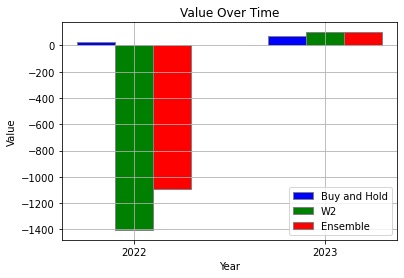

In [35]:
import matplotlib.pyplot as plt

# Data
years = [2022, 2023]
buy_and_hold = [29.42036440000001, 69.05754089999999]
W2 = [-1403.3220902, 100]
ensemble = [-1090.21418, 100]

# Set the width of the bars
bar_width = 0.2

# Set the positions of the bars on the x-axis
r1 = range(len(years))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

# Plot bars
plt.bar(r1, buy_and_hold, color='b', width=bar_width, edgecolor='grey', label='Buy and Hold')
plt.bar(r2, W2, color='g', width=bar_width, edgecolor='grey', label='W2')
plt.bar(r3, ensemble, color='r', width=bar_width, edgecolor='grey', label='Ensemble')

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Value')
plt.title('Value Over Time')
plt.xticks([r + bar_width for r in range(len(years))], years)
plt.legend()

# Show plot
plt.grid(True)
plt.show()


In [36]:
I1=(df_t["I1"]==df_t["+/-"]).sum()/len(df_t)*100
I3=(df_t["I3"]==df_t["+/-"]).sum()/len(df_t)*100
I5=(df_t["I5"]==df_t["+/-"]).sum()/len(df_t)*100
print(I1,I3,I5)

54.807692307692314 50.96153846153846 50.96153846153846


In [37]:
# Define the lists
I1 = [1083.904938, 50.36708829999995]
I2 = [769.2491151999998, -360.46233370000016]
I3 = [769.2491151999998, -360.46233370000016]

# Calculate the sum of elements in each list
sum_I1 = sum(I1)
sum_I2 = sum(I2)
sum_I3 = sum(I3)

# Find the list with the highest sum
max_sum_list = max([(sum_I1, 'I1'), (sum_I2, 'I2'), (sum_I3, 'I3')])

# Print the result
print(f"The list with the highest sum is {max_sum_list[1]} with a sum of {max_sum_list[0]}.")



The list with the highest sum is I1 with a sum of 1134.2720262999999.


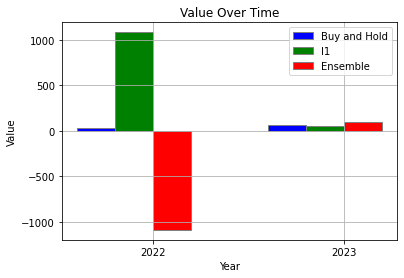

In [39]:
import matplotlib.pyplot as plt

# Data
years = [2022, 2023]
buy_and_hold = [29.42036440000001, 69.05754089999999]
I1 = [1083.904938, 50.36708829999995]
ensemble = [-1090.21418, 100]

# Set the width of the bars
bar_width = 0.2

# Set the positions of the bars on the x-axis
r1 = range(len(years))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]
r4 = [x + bar_width for x in r3]

# Plot bars
plt.bar(r1, buy_and_hold, color='b', width=bar_width, edgecolor='grey', label='Buy and Hold')
plt.bar(r2, I1, color='g', width=bar_width, edgecolor='grey', label='I1')
plt.bar(r3, ensemble, color='r', width=bar_width, edgecolor='grey', label='Ensemble')

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Value')
plt.title('Value Over Time')
plt.xticks([r + bar_width*1.5 for r in range(len(years))], years)
plt.legend()

# Show plot
plt.grid(True)
plt.show()

